In [136]:
# max accuracy i achieved was 93% revisit or rewrite
import numpy as np
import matplotlib.pyplot as plt
import gzip

In [88]:
def load_mnist_to_np(image_num, path):
    f = gzip.open(path, "r")

    f.read(4)# magic number
    num_images = int.from_bytes(f.read(4),byteorder='big')
    num_rows = int.from_bytes(f.read(4),byteorder='big')
    num_columns = int.from_bytes(f.read(4),byteorder='big')
    
    buf = f.read(num_rows * num_columns * image_num)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(-1, 28, 28)
    
    f.close()
    
    return data 

In [82]:
def load_labels_to_np(label_num, path):
    f = gzip.open(path, "r")

    f.read(4)# magic number
    num_images = int.from_bytes(f.read(4),byteorder='big')
    
    buf = f.read(num_images)
    data = np.frombuffer(buf, dtype=np.uint8)
    #data = data.reshape(-1,10)
    f.close()
    
    return data 

In [83]:
path_training = "../mnist/train-images-idx3-ubyte.gz"
path_labels = "../mnist/train-labels-idx1-ubyte.gz"
data = load_mnist_to_np(60000,path_training)
labels = load_labels_to_np(60000,path_labels)
training = list(zip(data,labels))

In [84]:
def sigmoid(x):
    # f(x) = 1 / (1+e^-x)
    return 1.0 / (1.0 + np.exp( -x ))

def sigmoid_deriv(x):
    #Derivative of the sigmoid function
    return sigmoid(x) * (1 - sigmoid(x))

In [85]:
#cost function (loss function ? is it the same)
def mse_loss(y_true, y_pred):
    # numpy arrays of same length
    return ((y_true-y_pred) ** 2).mean()

In [102]:
class Network():
    
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.uniform(0,0,(y, 1)) for y in sizes[1:]]
        self.weights = [np.random.uniform(-0.5, 0.5,(y, x))
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, a):
        c = a.reshape(-1, 784).T
        for b, w in zip(self.biases, self.weights):
            c = sigmoid(np.dot(w,c) + b)
        return np.argmax(c)
    
    def SGD(self, training_data,labels, epochs,batch_size=128, learn_rate=0.01, test_data=None):
        for j in range(epochs):
            # gibt mir 128 bilder zurück 
            #randint geht von 0 bis hier 3000 (3000 Bilder) und 128 zahlen also random bilder
            # wenn in ein numpy array ein array index wird geht er jeden wert durch holt die matrix 
            # und speichert alle in einem neuen array
            samp = np.random.randint(0, data.shape[0], size = batch_size)
            X = training_data[samp].reshape(-1, 28*28)
            X = X / 255
            Y = labels[samp]
        
            #backprop
            #self.backprop(training_data,labels, learn_rate)
            self.backprop(X,Y, learn_rate)
            
            if test_data:
                print (f"Epoch {j}: {self.evaluate(test_data)} / {n_test}")
            else:
                pass
                #print (f"Epoch {j} complete")    
                
    def backprop(self, X, Y, learn_rate):
        nr_correct = 0
        for i in range(len(X)):
            activation = X[i].reshape(784,1)
            # save the activations for backproping
            activations = []
            # input goes into the activation array 
            activations.append(activation)
            # save the values before activation function
            zl = []
            # forward pass
            for b, w in zip(self.biases, self.weights):
                z = np.dot(w, activation) + b
                zl.append(z)
                
                activation = sigmoid(z)
                activations.append(activation)
         
            
            # transform label from a number to a matrix which is zero except for that number
            y = np.zeros((10,1), np.float32)
            y[Y[i],range(y.shape[1])] = 1
            
            nr_correct += int(np.argmax(activations[-1]) == np.argmax(y))
            #backwards pass
            #substract output_layer - label 
            delta = (activations[-1] - y)
            #delta = delta * sigmoid_deriv(zl[-1])
            
            # first gradient descent
            # multiply the error times the output of the layer before and adjust it with the learning_rate
            self.weights[-1] += -learn_rate * np.dot(delta, activations[-2].T)
            self.biases[-1] += learn_rate * delta
            
            #backward pass loop start from first hidden layer
            for l in range(2, self.num_layers):
                # undo activation function of the layer
                z = zl[-l]
                da_z = sigmoid_deriv(z)
                
                # delta between guess and output aka error //dc_a * da_z
                delta = np.dot(self.weights[-l + 1].T, delta) * da_z
                
                #multiply delta with the activation of previous layer to get the gradient
                dc_w = np.dot(delta,activations[-l - 1].T)
                
                #gradient descent
                self.weights[-l] += -learn_rate * dc_w
                self.biases[-l] += -learn_rate * delta
            
        #print(nr_correct)
        print(f"Acc: {round((nr_correct / X.shape[0]) * 100, 2)}%")

In [105]:
n = Network([784,128,10])

n.SGD(data,labels,500,128,0.001)

Acc: 9.38%
Acc: 8.59%
Acc: 13.28%
Acc: 11.72%
Acc: 16.41%
Acc: 21.09%
Acc: 25.0%
Acc: 24.22%
Acc: 23.44%
Acc: 19.53%
Acc: 28.91%
Acc: 26.56%
Acc: 30.47%
Acc: 35.16%
Acc: 39.84%
Acc: 32.81%
Acc: 31.25%
Acc: 42.19%
Acc: 39.06%
Acc: 40.62%
Acc: 34.38%
Acc: 37.5%
Acc: 41.41%
Acc: 46.09%
Acc: 49.22%
Acc: 45.31%
Acc: 52.34%
Acc: 52.34%
Acc: 43.75%
Acc: 52.34%
Acc: 53.12%
Acc: 49.22%
Acc: 55.47%
Acc: 53.91%
Acc: 62.5%
Acc: 57.81%
Acc: 60.94%
Acc: 61.72%
Acc: 64.84%
Acc: 53.12%
Acc: 61.72%
Acc: 53.91%
Acc: 72.66%
Acc: 58.59%
Acc: 74.22%
Acc: 57.81%
Acc: 60.16%
Acc: 64.06%
Acc: 71.88%
Acc: 58.59%
Acc: 72.66%
Acc: 57.81%
Acc: 67.19%
Acc: 60.94%
Acc: 66.41%
Acc: 66.41%
Acc: 69.53%
Acc: 72.66%
Acc: 71.09%
Acc: 70.31%
Acc: 72.66%
Acc: 68.75%
Acc: 68.75%
Acc: 66.41%
Acc: 70.31%
Acc: 64.06%
Acc: 72.66%
Acc: 78.12%
Acc: 69.53%
Acc: 74.22%
Acc: 73.44%
Acc: 75.0%
Acc: 74.22%
Acc: 77.34%
Acc: 76.56%
Acc: 67.97%
Acc: 72.66%
Acc: 75.78%
Acc: 77.34%
Acc: 74.22%
Acc: 75.0%
Acc: 75.0%
Acc: 75.78%
Acc: 68.75%


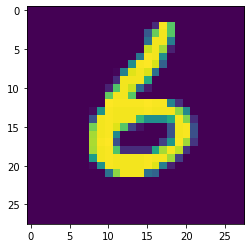

6


/var/folders/xb/tql77jt13z7fd6cqtftw62nm0000gn/T/ipykernel_7703/2810796055.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp( -x ))


In [144]:
import random as r
x = r.randrange(0,60000)
image = np.asarray(data[x].squeeze())
plt.imshow(image)
plt.show()
print(n.feedforward(data[x]))